# Question1. 
Using the polynomial interpolation Python code polint.py of “Numerical Recipes in 
C”, compute and then plot a curve for x in the interval [-1, 4], passing through exactly the 
points (x,y) = (-1, 1.25), (1, 2), (2,3), (4,0) with a cubic polynomial. 

## ANSWER OF QUESTION 1

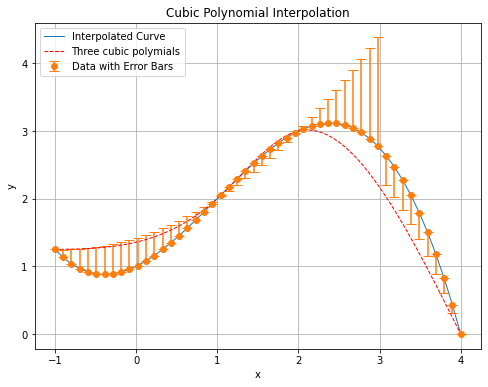

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# this code polint() is copied from https://phyweb.physics.nus.edu.sg/~phywjs/CZ5101/polint.py
def polint(xa, ya, n, x, y, dy):
    # initialize c and d to be equal to ya
 
    c = ya.copy()
    d = ya.copy()
    # then find an index ns which is closest to the value x in xa()
    ns = 0
    dif = math.fabs(x-xa[0])
    for i in range(1,n):
        dift = math.fabs(x-xa[i])
        if (dift < dif):
            ns = i
            dif = dift
    y[0] = ya[ns]
    ns -= 1

    # do double loop over column m and row i on the triangular Tableau.
    # we don't try to catch the dividing by 0 error, let Python itself do it
    for m in range(1,n):
        for i in range(0,n-m):
            ho = xa[i]-x
            hp = xa[i+m]-x
            w = c[i+1]-d[i]
            den = ho - hp
            den = w/den
            d[i] = hp*den
            c[i] = ho*den
        # end for i
        # tricking coding here in C
        if(2*(ns+1) < (n-m)):
            dy[0] = c[ns+1]
        else:
            dy[0] = d[ns]
            ns -= 1
        # end if else
        y[0] += dy[0]
    # end for m
    #print(c)
    #print(d)

# a test run
xa = [-1,1,2,4]
ya = [1.25,2,3,0]
x = 3.0
y = [0]
dy = [0]
n = 4
polint(xa,ya,n,x,y,dy)
#print("y=",y, "dy=",dy)

#we dont use to match sample here to see the single point
x_interpolated = np.linspace(-1, 4, 50)
#list to save y 
y_interpolated = []    
#list to save dy
dy1_interpolated = []

#calculate y for each element in x
for i in range(len(x_interpolated)):
    y = [0]
    dy = [0]
    polint(xa,ya,n,x_interpolated[i],y,dy)
    y_interpolated.append(y[0])
    dy1_interpolated.append(dy[0])

#prepare data for errbar,which take direction into consideration.
dy_interpolated=[[],[]]
for i in range(len(dy1_interpolated)):
    if dy1_interpolated[i] >=0:
        dy_interpolated[0].append(dy1_interpolated[i])
        dy_interpolated[1].append(0)
    if dy1_interpolated[i] <0:
        dy_interpolated[0].append(0)
        dy_interpolated[1].append(math.fabs(dy1_interpolated[i]))

#print (dy)
#print(y_interpolated)

# Plotting the data points and the interpolated curve
plt.figure(figsize=(8, 6))
"""
The following are the result calculated by polint()
"""

plt.plot(x_interpolated, y_interpolated, label='Interpolated Curve', linewidth=1)
#plt.scatter(x_interpolated, y_interpolated,color='red', label='Data Points', marker='o')
plt.errorbar(x_interpolated, y_interpolated, yerr=dy_interpolated, fmt='o', capsize=5, label='Data with Error Bars')


"""
The following are the result of three cubic polynomials with natural conditions
I got this result in the homework we have done before
"""
#[-1,1]
x= np.linspace(-1,1,50)
y= 0.08928571428571447*x**3+0.2678571428571434*x**2+0.28571428571428553*x+ 1.3571428571428565

#[1,2]
a= np.linspace(1,2,50)
b = -0.625*a**3+2.4107142857142874*a**2+-1.857142857142859*a+2.0714285714285716

#[2,4]
i= np.linspace(2,4,50)
j = 0.22321428571428578*i**3+-2.6785714285714293*i**2+8.321428571428573*i+-4.714285714285716

plt.plot(x,y,color='red',linewidth=1.0,linestyle='--')
plt.plot(a,b,color='red',linewidth=1.0,linestyle='--')
plt.plot(i,j,color='red',linewidth=1.0,label='Three cubic polymials',linestyle='--')

"""
Default painting zones
"""

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Polynomial Interpolation')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
xa = [59.3,51.52,118.1,61.1]
ya = [0.16,0.14,0.31,0.17]

x = 109.5
y = [0]
polint(xa,ya,n,x,y,dy)
print(y)

x = 73
y = [0]
polint(xa,ya,n,x,y,dy)
print(y)

x = 78.5
y = [0]
polint(xa,ya,n,x,y,dy)
print(y)

x = 114
y = [0]
polint(xa,ya,n,x,y,dy)
print(y)

[0.42514315733392294]
[0.26774664403942194]
[0.3214406914711284]
[0.3762739499710098]


In [6]:
xa = [59.3,51.52,118.1,61.1]
ya = [0.16,0.14,0.31,0.17]

x_list = [109.5,73,78.5,114]
for item in x_list:
    x = item
    y = [0]
    polint(xa,ya,n,x,y,dy)
    print(y)

[0.42514315733392294]
[0.26774664403942194]
[0.3214406914711284]
[0.3762739499710098]


# Question 2
Implement the Romberg integration method in Python [following the “Numerical 
Recipes” code qromb(), trapzd.py and polint.py], and compute the integral: 

Here ln means natural logarithm (base e). Use different parameters (such as the number 
of iterations JMAX, and convergence criteria EPS), compare the results. What is your 
most accurate estimation of the integral you can get? Give an error estimate of the 
answers. Compare with the exact answer. You can obtain exact answer with a symbolic 
integration system, such as Mathematica, and evaluate to high accuracy (say 16 digits).

## Answer of Q2

In [155]:
"""
Function Declaration Area for Q2
reference:https://phyweb.physics.nus.edu.sg/~phywjs/CZ5101/trapzd.py
"""

import math

# This is the function we need to solve in this case
def FUNC(x):
    A = x**4
    B = x+pow(x**2+1,0.5)
    B = math.log(B)
    return (A*B)

def trapzd(FUNC, a, b, n, s):
    if n==1:
        s = 0.5*(b-a)*(FUNC(a)+FUNC(b))
        return s
    else:
        it = 2**(n-2)
        d = (b-a)/it
        x = a + 0.5*d
        sum = 0.0
        for j in range(0,it):
            sum += FUNC(x)
            x += d
        s = 0.5*(s + (b-a)*sum/it)
        return s
    # end if
def qtrap(FUNC, a, b,EPS,JMAX):

    olds = -1.0e300
    s = 0.0
    for j in range(1, JMAX):
        s = trapzd(FUNC,a,b,j,s)
        if (math.fabs(s-olds) < EPS*math.fabs(olds)):
            return s
        if(s == 0.0 and olds == 0.0 and j > 6):
            return s
        olds = s
# end def qtrap


In [161]:
"""
The following code is transformed form the  “Numerical Recipes” code qromb()
"""
def qromb(FUNC,a,b,EPS,K,JAMX):
    
    JMAXP = JMAX+1               # max step of comb
    ss = [0]                     # y
    dss =[0]                     # dy 
    s = [0]*JMAX                 # caculated result by trapzd
    h = [0]*JMAXP                # interval for trapzd
    s_t = [0]*K                  # list to save result BY trapzd
    h_t = [0]*K                  # list to save the length of the interval
    
    h[0]=1.0
    old = 0
    for j in range(1,JMAX+1,1):
        s[j-1] = trapzd(FUNC,a,b,j,old)
        old = s[j-1]
        #print(old)
        if(j>=K):
            for i in range(0,K,1):
                h_t[i]=h[j-K+i]
                s_t[i]=s[j-K+i]
                #print(h_t[i],s_t[i])
            #imagine a function with x from h_t and y from s_t
            #then we use the polint to find the value when x = 0
            polint(h_t,s_t,K,0.0,ss,dss)
            if (math.fabs(dss[0])<=EPS*math.fabs(ss[0])):
                return ss,dss[0]
        h[j]=0.25*h[j-1]
    print("too many steps in routine qromb")
    return ss,dss[0] 

EPS =1.0E-10
JMAX = 20

"""
Testing area
"""
res1,dy1= qromb(FUNC,0.0,2.0,EPS,5,JMAX)
res2= qtrap(FUNC,0.0,2.0,EPS,JMAX)
print("The result calculated by qromb is,",res1[0],"with error equals to",dy1)
print("The result calculated by qtrap is",res2)
print("The result calculated by mathematica is",8.1533641198111650)

The result calculated by qromb is, 8.153364120229153 with error equals to -5.556385417297208e-10
The result calculated by qtrap is 8.153364120069917
The result calculated by mathematica is 8.153364119811165


In [162]:
#K = 5 in this cell
# we try to use different EPS in this cell
EPS =1.0E-10
JMAX = 25
j = 10
K = 5
answer = 8.153364119811165

EPS_list = []
res_list = []
err_list = []

for i in range(0,10,1):
    res,dy = qromb(FUNC,0.0,2.0,EPS,K,JMAX)
    EPS_list.append(EPS)
    res_list.append(res)
    temp = math.fabs(answer-res[0])
    err_list.append(dy)
    print(i,res)
    EPS/=10
print(res_list)

0 [8.153364120229153]
1 [8.153364119810162]
2 [8.153364119810162]
3 [8.153364119811163]
4 [8.153364119811163]
5 [8.153364119811167]
6 [8.153364119811167]
7 [8.153364119811167]
8 [8.153364119811163]
too many steps in routine qromb
9 [8.153364119811286]
[[8.153364120229153], [8.153364119810162], [8.153364119810162], [8.153364119811163], [8.153364119811163], [8.153364119811167], [8.153364119811167], [8.153364119811167], [8.153364119811163], [8.153364119811286]]


In [163]:
from tabulate import tabulate
print(tabulate({'EPS':EPS_list,'result': res_list,'err_of_qromb':err_list, }, headers="keys",tablefmt='github'))

|   EPS | result              |   err_of_qromb |
|-------|---------------------|----------------|
| 1e-10 | [8.153364120229153] |   -5.55639e-10 |
| 1e-11 | [8.153364119810162] |   -3.80714e-12 |
| 1e-12 | [8.153364119810162] |   -3.80714e-12 |
| 1e-13 | [8.153364119811163] |   -1.09576e-14 |
| 1e-14 | [8.153364119811163] |   -1.09576e-14 |
| 1e-15 | [8.153364119811167] |   -3.40326e-17 |
| 1e-16 | [8.153364119811167] |   -3.40326e-17 |
| 1e-17 | [8.153364119811167] |   -3.40326e-17 |
| 1e-18 | [8.153364119811163] |    3.58748e-18 |
| 1e-19 | [8.153364119811286] |    2.98083e-16 |


with K = 5, When EPS is larger than 1e-18, the err of becomes bigger reversly, no matter how many step it calculate
So just increase Jmax can not get better result, a proper EPS is important

In [167]:
# with EPS = 1E-18
# we try to use different K in this cell
EPS =1.0E-18
JMAX = 25
j = 10
answer = 8.153364119811165

K_list = []
res_list = []
err_list = []
err2_list = []

for i in range(5,16,1):
    res,dy = qromb(FUNC,0.0,2.0,EPS,i,JMAX)
    K_list.append(i)
    res_list.append(res)
    temp = math.fabs(answer-res[0])
    err_list.append(dy)
    err2_list.append(temp)

from tabulate import tabulate
print(tabulate({'K':K_list,'result': res_list,'err_of_qromb':err_list,"Difference between two result":err2_list }, headers="keys",tablefmt='github'))

|   K | result              |   err_of_qromb |   Difference between two result |
|-----|---------------------|----------------|---------------------------------|
|   5 | [8.153364119811163] |    3.58748e-18 |                     1.77636e-15 |
|   6 | [8.153364119811167] |    2.19474e-18 |                     1.77636e-15 |
|   7 | [8.153364119811167] |    3.0963e-19  |                     1.77636e-15 |
|   8 | [8.153364119811167] |    5.63569e-20 |                     1.77636e-15 |
|   9 | [8.153364119811167] |    1.27335e-20 |                     1.77636e-15 |
|  10 | [8.153364119811162] |   -1.75229e-20 |                     3.55271e-15 |
|  11 | [8.153364119811165] |    3.50206e-21 |                     0           |
|  12 | [8.153364119811163] |   -5.2067e-22  |                     1.77636e-15 |
|  13 | [8.153364119811163] |    5.54852e-23 |                     1.77636e-15 |
|  14 | [8.153364119811167] |    3.03566e-23 |                     1.77636e-15 |
|  15 | [8.153364119811174] 

### with eps = 1E-18, K=11,  JMAX
### we can get the most accurate estimation = 8.153364119811165, with error estimation = 3.50206e-21
### while the result from mathematic should be 8.1533641198111650205
### Our answer is limited by the data type(float) we use it this question, 


# Answer of Question 3

The following is how I got the final result:  
For Markov Chain:
+ intial the basic positon of each particle
+ write a basic random walk without considerating the distribution make sure the programme is running  properly
+ take distribution into consideration, calculate the wavefunction for each step, the step only move on when random.random()< (ratio)**2
+ run a simulation with step = 50000, record the postion of elcetron of each step
+ after running the simulation, draw the electron cloud according to the position we record
+ exam if our wave function by checking if the distribution of electron is closed to what we have learned in textbook  

If we have correct distribution, we can move to next step  
For Monte Carlo method：
+ use a test function at the beggining
+ for each step in markov chain, calculate the function, and save the result in a list
+ after the simulation, cut-off the first50% point, which may be effected by the initial position
+ Find their average of the remaining

after confirming the Monte Carlo process is correct，we need to:
+ **find a correct function to calculate the average E for each step**, this is the most different part, beacause we need to calculate the Laplacians 
+ rewrite Monte Carlo the procees into a function EM, with iter and rab as input

after we got EM and function for E, we can:
+ x = linspace(0.1,5,300)
+ y = EM(iter,x[i]),repeat 10times for each rab, then we calculated the E by np.average() and yerr by np.var()
+ Make a plot of energy (with error bars) vs. rAB.


In [5]:
import random
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from tqdm import tqdm
import numpy as np

In [93]:
"""
Function Declaration Area

"""

#x,y,x move or move back randomly
def randomwork(e):
    for i in range(len(e)):
        e[i] = e[i]+random.random()-0.5
    return e

#ϕ(r)=e^(-r/a),
def phi(r,a):
    result = math.e**(-(r/a))
    return result

#used to calculate the average E
def FUNCT(e1,e2,rab):
    # ra = [0,0,0]
    r_1a = pow(e1[0]**2+e1[1]**2+e1[2]**2,0.5)
    r_2a = pow(e2[0]**2+e2[1]**2+e2[2]**2,0.5)
    
    # rb = [rab,0,0]
    r_1b = pow((rab-e1[0])**2+e1[1]**2+e1[2]**2,0.5)
    r_2b = pow((rab-e2[0])**2+e2[1]**2+e2[2]**2,0.5)
    
    r12 = pow((e2[0]-e1[0])**2+(e2[1]-e1[1])**2+(e2[2]-e1[2])**2,0.5)
    #wavefunction
    wf = phi(r_1a,1)*phi(r_2b,1)+phi(r_2a,1)*phi(r_1b,1)
    
    #calculate the <phi|H|phi>
    A = phi(r_2a+r_1b,1)*(-1+1/r_2a+1/r_1b)
    B = phi(r_1a+r_2b,1)*(-1+1/r_1a+1/r_2b)
    C = (-1/r_1a-1/r_1b-1/r_2a-1/r_2b+1/r12+1/rab)*wf
    #D now is the numerator of the H
    D = A+B+C
    #D = (wf*D)/(wf**2)
    D = D/wf
    
    result = D
    
    return result

# This function is generated based on the question stem
def wavefunction(e1,e2,rab):
    
    # ra = [0,0,0]
    r_1a = pow(e1[0]**2+e1[1]**2+e1[2]**2,0.5)
    r_2a = pow(e2[0]**2+e2[1]**2+e2[2]**2,0.5)
    
    # rb = [rab,0,0]
    r_1b = pow((rab-e1[0])**2+e1[1]**2+e1[2]**2,0.5)
    r_2b = pow((rab-e2[0])**2+e2[1]**2+e2[2]**2,0.5)
    
    #For A 
    #rmin = pow((rab/2)**2,0.5)
    #A = phi(rmin,1)**2+phi(rmin,1)**2
    
    result = phi(r_1a,1)*phi(r_2b,1)+phi(r_2a,1)*phi(r_1b,1)
    result = result
    #we will square the result when we use the ratio later
    #as for now we only need the ϕ(r) in case we need to use it
    return result

def calculate_standard_error(data):
    N = len(data)
    mean = sum(data) / N
    squared_diff = [(x - mean)**2 for x in data]
    sample_variance = sum(squared_diff) / (N - 1)
    standard_deviation = math.sqrt(sample_variance)
    standard_error = standard_deviation / math.sqrt(N)
    return standard_error

The number of sample is: 500000


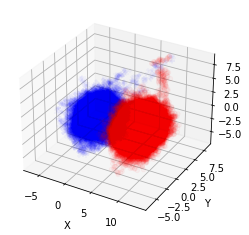

In [76]:
"""
Testing area
This area is to draw the electron cloud, to exam if our wavefunction is correct
This process help me find a mistake in phi()
"""

iter =500000

rab = 8.0
#hydro position
ra = [0,0,0]
rb = [rab,0,0]
#initial electron position
e1 = [rab,rab,rab]
e2 = [rab,rab,rab]

i = 0

#debug part,saving the postion of electrons, and then we need to draw it
x1 = []
y1 = []
z1 = []
x2 = []
y2 = []
z2 = []

while i < iter:
    # save the earlier crrdinates
    # the electron should return its original positions 
    # if it the moment is unacceptable;
    temp1 = e1.copy()
    temp2 = e2.copy()
    temp_phi = wavefunction(e1,e2,rab)
    #calcaulate potential energy 

    # try to move to next position
    e1 = randomwork(e1)
    e2 = randomwork(e2)
    new_phi = wavefunction(e1,e2,rab)
    
    #if i%10 == 0:
    #print(ratio)
    ratio = new_phi/temp_phi
    if random.random()< (ratio)**2:
        #temp_result = FUNCT(e1,e2,rab)
        #calculation_list.append(temp_result)
        #only update when random walk is allowed
        i +=1
        #print(e1,e2)
        #debug part, to see the distribution of electron    
        x1.append(e1[0])
        y1.append(e1[1])
        z1.append(e1[2])
        x2.append(e2[0])
        y2.append(e2[1])
        z2.append(e2[2])

    else:
        #go back to last step
        e1 = temp1
        e2 = temp2
        continue
    
    #print(e1,e2)
    #debug part, to see the movement of electron    

#print(calculation_list)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c='r', marker='o',alpha=0.03)
ax.scatter(x2, y2, z2, c='b', marker='+',alpha=0.03)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

print("The number of sample is:",len(x1))
plt.show()

The distribution is close to what we have learn in textbook.  
So, it is time for us to move forward.  
We can try to calculate the E now  

In [143]:
#The main process is rewrite as follows:
# with iter and rab is the input
def MT(iter,rab):

    ra = [0,0,0]
    rb = [rab,0,0]
    #initial position
    e1 = [rab,rab,rab]
    e2 = [rab,rab,rab]

    i = 0
    calculation_list = []
    while i < iter:
        # save the earlier crrdinates
        # the electron should return its original positions 
        # if it the moment is unacceptable;
        temp1 = e1.copy()
        temp2 = e2.copy()
        temp_phi = wavefunction(e1,e2,rab)
        #calcaulate potential energy 

        # try to move to next position
        e1 = randomwork(e1)
        e2 = randomwork(e2)
        new_phi = wavefunction(e1,e2,rab)

        #if i%10 == 0:
        #print(ratio)
        ratio = new_phi/temp_phi
        if random.random()< (ratio)**2:
            temp_result = FUNCT(e1,e2,rab)
            calculation_list.append(temp_result)
            #only update when random walk is allowed
            i +=1
        else:
            #go back to last step
            e1 = temp1
            e2 = temp2
            continue
    # the following is to calculate the average E
    # throw away the first 50% 
    cut_off_point = int(iter/2)
    fixed_calculation_list=calculation_list[cut_off_point:]
    n = len(fixed_calculation_list)
    summation = 0
    for i in range(n):
        summation += fixed_calculation_list[i]
    result = summation/n
    
    # err calculation
    return result

a = MT(500,1.0)
print(a)

x = np.linspace(0.1,16,100)
#save result for each step
y = []
#save vriance
yerr = []
jmax = 10

for i in tqdm(range(len(x))):
    temp_list=[]
    for j in range(10):
        #we only run 5000 step to show the errbar :)
        result = MT(5000,x[i])
        temp_list.append(result)
    temp1 = np.mean(temp_list)
    temp2 = pow(np.var(temp_list),0.5)
    #print(temp2)
    y.append(temp1)
    yerr.append(temp2)


-1.1714878785256624


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [04:05<00:00,  2.45s/it]


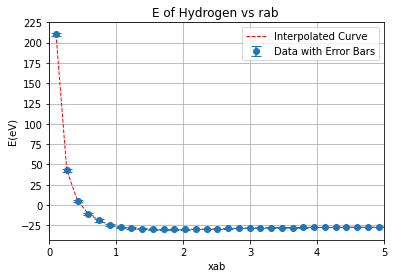

In [148]:
# tranfomed from 1 to eV
A = 27.211386245
#y*A
c = []
#yerr*A
d = []
for i in range(len(y)):
    c.append(y[i]*A)
    d.append(yerr[i]*A)
plt.plot(x,c,color='red',linewidth=1.0,linestyle='--',label = 'Interpolated Curve')
plt.errorbar(x, c, yerr=d, fmt='o', capsize=5, label='Data with Error Bars')
#print(c)
"""
Default painting zones
"""
plt.xlabel('xab')
plt.ylabel('E(eV)')
#plt.ylim(0,-1)
plt.yticks(np.arange(-25, max(c) + 25, 25))
plt.xlim(0,5)
plt.title('E of Hydrogen vs rab ')
plt.legend()
plt.grid(True)
plt.show()


# when rab goes infinte, the E goes to -1 in natural unit
# it is closed to 27.2eV,which is the hydrogen atom ground state energy*2